<a href="https://colab.research.google.com/github/JFRashu/123/blob/Python-code/New_dataset_Smooth_graph_csv_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New dataset plotting from csv**

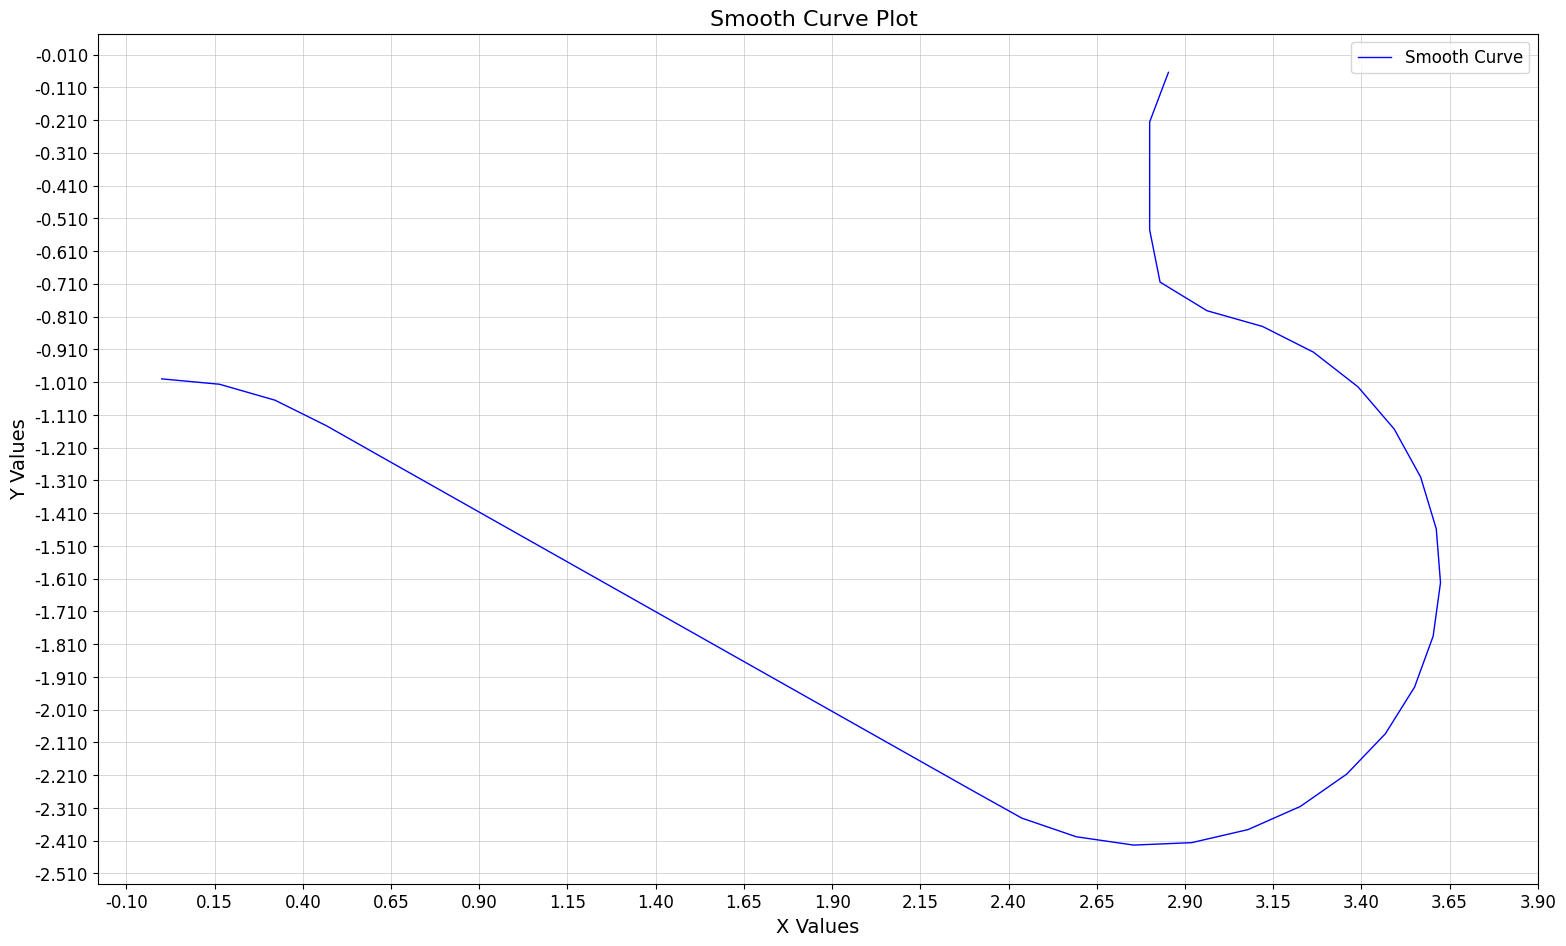

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
import requests
from io import StringIO  # Import StringIO from io module

# Set figure size for full width display
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["figure.autolayout"] = True

# Function to read data from URL
def read_csv_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        # Read CSV data directly from the response content
        df = pd.read_csv(StringIO(response.text))  # Use StringIO from io module
        # If the CSV has headers, pandas will automatically use them
        # Otherwise, you might need to handle the data differently

        # Converting to numpy array for consistency with the original code
        if len(df.columns) >= 2:  # Ensure there are at least 2 columns
            return df.iloc[:, 0:2].values  # Take first two columns as x,y
    return None

# URL to the CSV file
github_url = "https://raw.githubusercontent.com/JFRashu/123/refs/heads/main/Topology1.csv"

# Load data from the URL
data = read_csv_from_url(github_url)

if data is None:
    print("Failed to load data from URL")
else:
    original_x = data[:, 0]
    original_y = data[:, 1]

    # Create a new figure
    plt.figure(figsize=(16, 10))

    # Handle duplicate X values using parametric interpolation
    t = np.zeros(len(original_x))
    for i in range(1, len(original_x)):
        t[i] = t[i-1] + np.sqrt((original_x[i] - original_x[i-1])**2 + (original_y[i] - original_y[i-1])**2)

    # Use PchipInterpolator for smooth interpolation
    pchip_x = PchipInterpolator(t, original_x)
    pchip_y = PchipInterpolator(t, original_y)

    # Create a finer sampling of the parameter t for a smooth curve
    t_fine = np.linspace(t.min(), t.max(), 500000)

    # Generate smooth curve using PchipInterpolator
    x_smooth = original_x
    y_smooth = original_y

    # Plot the smooth curve
    plt.plot(x_smooth, y_smooth, color='blue', linewidth=1, label='Smooth Curve')

    # Set custom grid with specified intervals
    x_min = np.floor(original_x.min() * 4) / 4
    x_max = np.ceil(original_x.max() * 4) / 4
    x_ticks = np.arange(x_min - 0.1, x_max + 0.25, 0.25)

    y_min = np.floor(original_y.min() * 10) / 10
    y_max = np.ceil(original_y.max() * 10) / 10
    y_ticks = np.arange(y_min - 0.01,y_max +.01, 0.1)

    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))

    plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)
    plt.title("Smooth Curve Plot ", fontsize=16)
    plt.xlabel("X Values", fontsize=14)
    plt.ylabel("Y Values", fontsize=14)
    plt.legend(fontsize=12)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
    plt.savefig("New_dataset_without_smooth.png", format="png", dpi=1500)
    plt.show()

New dataset plotting from csv with modification

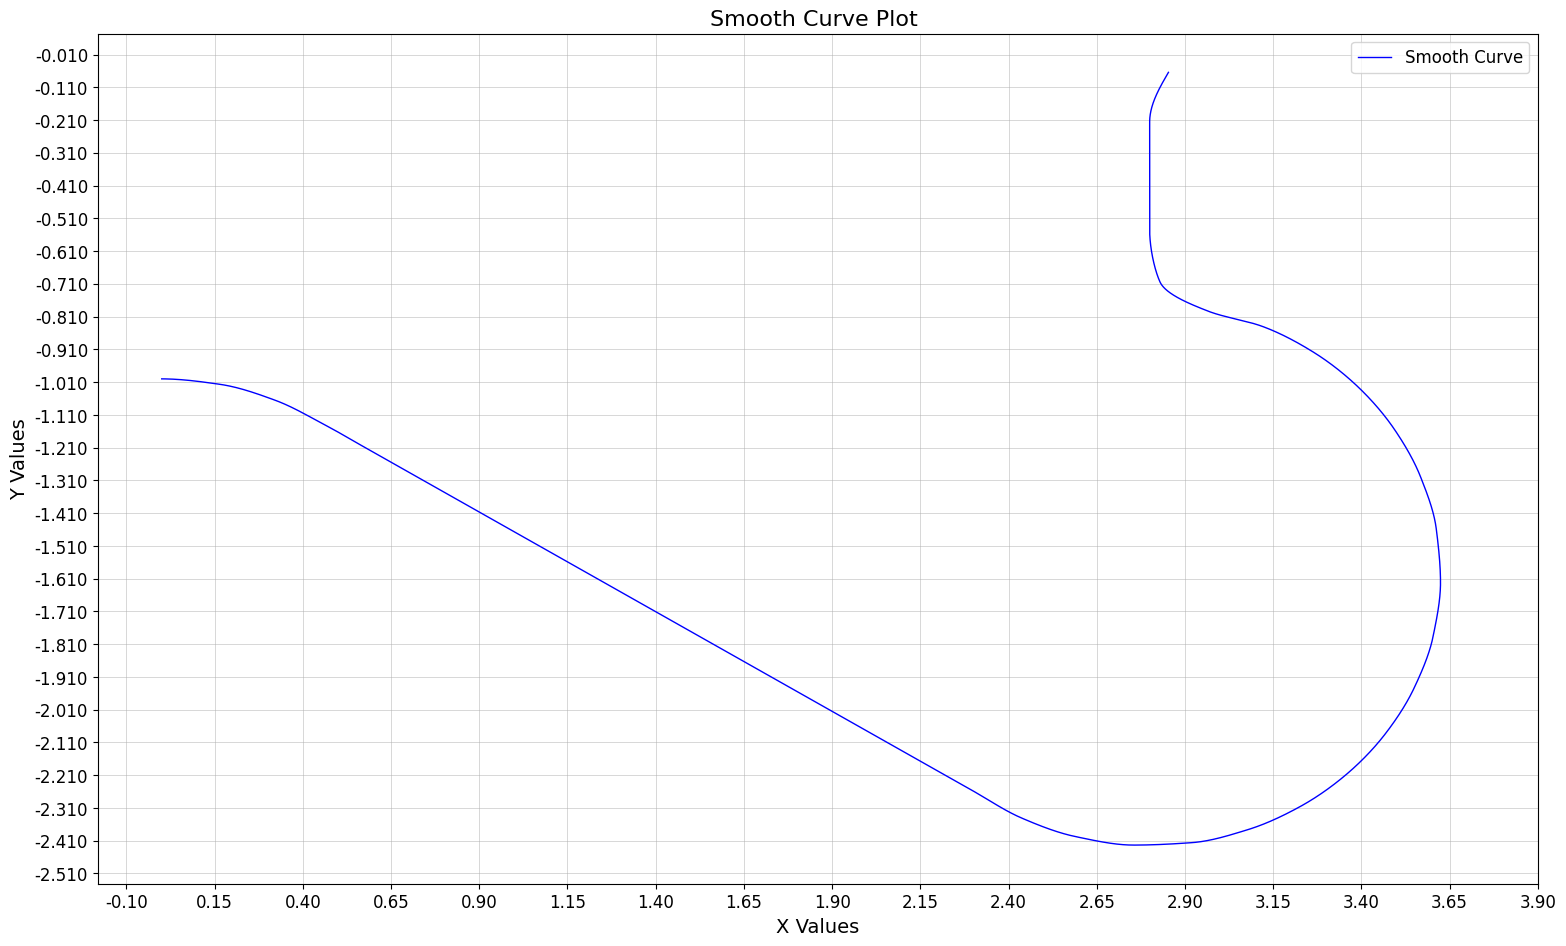

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
import requests
from io import StringIO  # Import StringIO from io module

# Set figure size for full width display
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["figure.autolayout"] = True

# Function to read data from URL
def read_csv_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        # Read CSV data directly from the response content
        df = pd.read_csv(StringIO(response.text))  # Use StringIO from io module
        # If the CSV has headers, pandas will automatically use them
        # Otherwise, you might need to handle the data differently

        # Converting to numpy array for consistency with the original code
        if len(df.columns) >= 2:  # Ensure there are at least 2 columns
            return df.iloc[:, 0:2].values  # Take first two columns as x,y
    return None

# URL to the CSV file
github_url = "https://raw.githubusercontent.com/JFRashu/123/refs/heads/main/Topology1.csv"

# Load data from the URL
data = read_csv_from_url(github_url)

if data is None:
    print("Failed to load data from URL")
else:
    original_x = data[:, 0]
    original_y = data[:, 1]

    # Create a new figure
    plt.figure(figsize=(16, 10))

    # Handle duplicate X values using parametric interpolation
    t = np.zeros(len(original_x))
    for i in range(1, len(original_x)):
        t[i] = t[i-1] + np.sqrt((original_x[i] - original_x[i-1])**2 + (original_y[i] - original_y[i-1])**2)

    # Use PchipInterpolator for smooth interpolation
    pchip_x = PchipInterpolator(t, original_x)
    pchip_y = PchipInterpolator(t, original_y)

    # Create a finer sampling of the parameter t for a smooth curve
    t_fine = np.linspace(t.min(), t.max(), 5000000)

    # Generate smooth curve using PchipInterpolator
    x_smooth = pchip_x(t_fine)
    y_smooth = pchip_y(t_fine)

    # Create 300 evenly spaced points along the curve
    total_length = t[-1]
    even_spaces = np.linspace(0, total_length, 100)

    # Interpolate to get the evenly spaced points
    # Interpolate to get the evenly spaced points
    x_interpolator = np.interp(even_spaces, t, original_x)
    y_interpolator = np.interp(even_spaces, t, original_y)


    # Create a DataFrame with the 300 points
    sampled_points = pd.DataFrame({
        'X': x_interpolator,
        'Y': y_interpolator
    })

    # Save to CSV
    output_file = "new_dataset_100_points_without_smoothness.csv"
    sampled_points.to_csv(output_file, index=False)

    # Plot the smooth curve
    plt.plot(x_smooth, y_smooth, color='blue', linewidth=1, label='Smooth Curve')

    # Set custom grid with specified intervals
    x_min = np.floor(original_x.min() * 4) / 4
    x_max = np.ceil(original_x.max() * 4) / 4
    x_ticks = np.arange(x_min - 0.1, x_max + 0.25, 0.25)

    y_min = np.floor(original_y.min() * 10) / 10
    y_max = np.ceil(original_y.max() * 10) / 10
    y_ticks = np.arange(y_min - 0.01,y_max +.01, 0.1)

    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))

    plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)
    plt.title("Smooth Curve Plot ", fontsize=16)
    plt.xlabel("X Values", fontsize=14)
    plt.ylabel("Y Values", fontsize=14)
    plt.legend(fontsize=12)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
    plt.savefig("New_dataset_with_smoothness_type_1.png", format="png", dpi=1500)
    plt.show()

# **Generated_dataset_plotted**

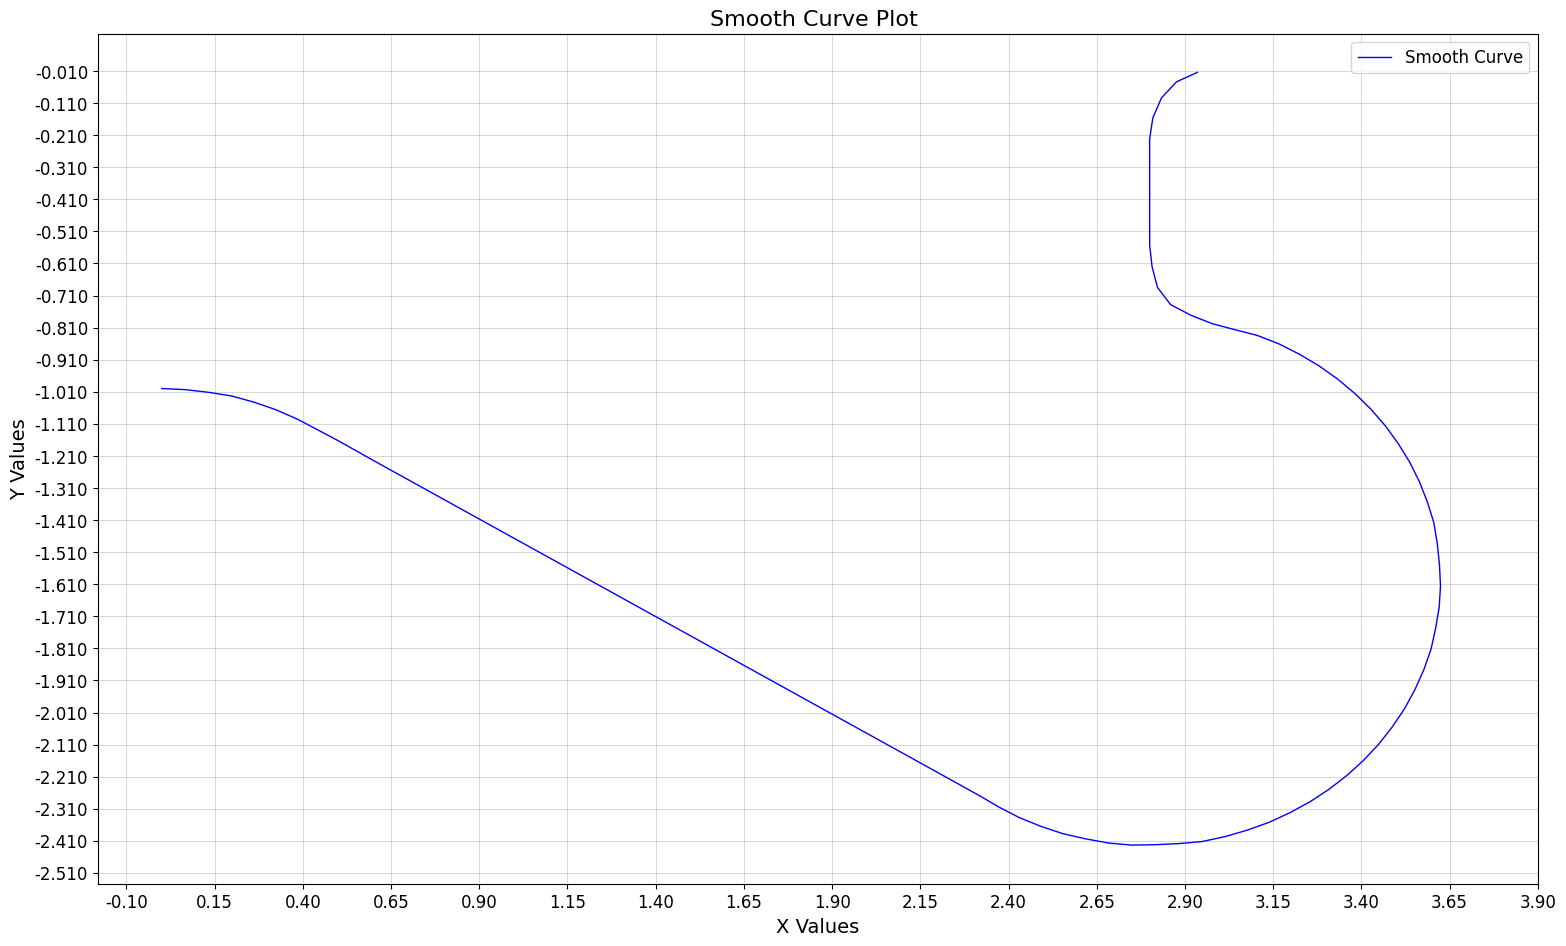

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
import requests
from io import StringIO  # Import StringIO from io module

# Set figure size for full width display
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["figure.autolayout"] = True

# Function to read data from URL
def read_csv_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        # Read CSV data directly from the response content
        df = pd.read_csv(StringIO(response.text),skiprows=1)  # Use StringIO from io module
        # If the CSV has headers, pandas will automatically use them
        # Otherwise, you might need to handle the data differently

        # Converting to numpy array for consistency with the original code
        if len(df.columns) >= 2:  # Ensure there are at least 2 columns
            return df.iloc[:, 0:2].values  # Take first two columns as x,y
    return None

# URL to the CSV file
github_url = "https://raw.githubusercontent.com/JFRashu/123/refs/heads/main/newdataset_for_100_coordinates_with_smoothness.csv"

# Load data from the URL
data = read_csv_from_url(github_url)

if data is None:
    print("Failed to load data from URL")
else:
    original_x = data[:, 0]
    original_y = data[:, 1]

    # Create a new figure
    plt.figure(figsize=(16, 10))

    # Handle duplicate X values using parametric interpolation
    t = np.zeros(len(original_x))
    for i in range(1, len(original_x)):
        t[i] = t[i-1] + np.sqrt((original_x[i] - original_x[i-1])**2 + (original_y[i] - original_y[i-1])**2)

    # Use PchipInterpolator for smooth interpolation
    pchip_x = PchipInterpolator(t, original_x)
    pchip_y = PchipInterpolator(t, original_y)

    # Create a finer sampling of the parameter t for a smooth curve
    t_fine = np.linspace(t.min(), t.max(), 500000)

    # Generate smooth curve using PchipInterpolator
    x_smooth = original_x
    y_smooth = original_y

    # Plot the smooth curve
    plt.plot(x_smooth, y_smooth, color='blue', linewidth=1, label='Smooth Curve')

    # Set custom grid with specified intervals
    x_min = np.floor(original_x.min() * 4) / 4
    x_max = np.ceil(original_x.max() * 4) / 4
    x_ticks = np.arange(x_min - 0.1, x_max + 0.25, 0.25)

    y_min = np.floor(original_y.min() * 10) / 10
    y_max = np.ceil(original_y.max() * 10) / 10
    y_ticks = np.arange(y_min - 0.01,y_max +.01, 0.1)

    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))

    plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)
    plt.title("Smooth Curve Plot ", fontsize=16)
    plt.xlabel("X Values", fontsize=14)
    plt.ylabel("Y Values", fontsize=14)
    plt.legend(fontsize=12)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
    plt.savefig("New_dataset_without_smoothness.png", format="png", dpi=1500)
    plt.show()

# **Slightly modified data**

300 points have been saved to newdataset_for_100_coordinates_with_smoothness.csv


<ipython-input-25-dcd364d175a5>:97: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("111.png", format="png", dpi=1500)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


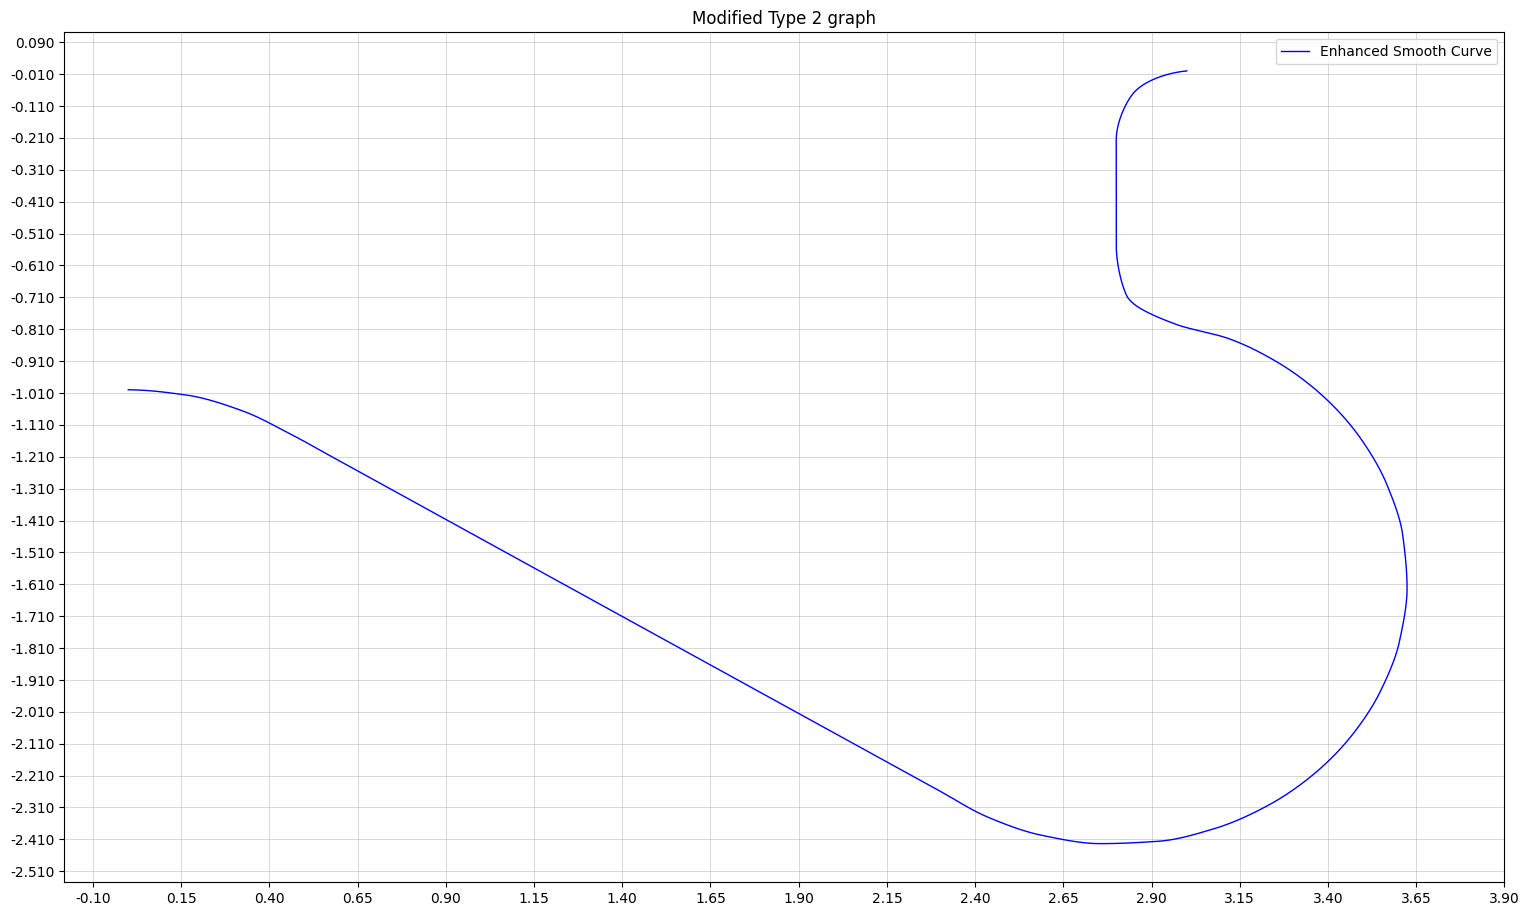

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import PchipInterpolator, splprep, splev

# URL of the raw CSV file from GitHub
github_url = "https://raw.githubusercontent.com/JFRashu/123/refs/heads/main/Topology1.csv"

# Read CSV file from GitHub, skipping the first row (index 0)
data = pd.read_csv(github_url, header=None).to_numpy()

# Extract X and Y columns
original_x = data[:, 0]
original_y = data[:, 1]

# Define the special portion (first 6 points for splprep)
special_x = original_x[:6]
special_y = original_y[:6]
remaining_x = original_x[:]  # Include last point of special_x to merge smoothly
remaining_y = original_y[:]

# Apply splprep + splev for the special portion with increased smoothing
tck, u = splprep([special_x, special_y], s=0.01, k=3)  # Increased smoothing
u_fine = np.linspace(0, 1, 150000)  # More fine points for a smoother curve
x_smooth_spl, y_smooth_spl = splev(u_fine, tck)

# Apply PchipInterpolator for the remaining data
t_remaining = np.zeros(len(remaining_x))
for i in range(1, len(remaining_x)):
    t_remaining[i] = t_remaining[i - 1] + np.sqrt(
        (remaining_x[i] - remaining_x[i - 1]) ** 2 + (remaining_y[i] - remaining_y[i - 1]) ** 2
    )

pchip_x = PchipInterpolator(t_remaining, remaining_x)
pchip_y = PchipInterpolator(t_remaining, remaining_y)
t_fine = np.linspace(t_remaining.min(), t_remaining.max(), 50000000)
x_smooth_pchip = pchip_x(t_fine)
y_smooth_pchip = pchip_y(t_fine)

# Merge both smooth curves by ensuring continuity at the boundary
merged_x =  x_smooth_pchip
merged_y =  y_smooth_pchip

# Generate 300 evenly spaced points along the curve
# First, create a parameter that represents distance along the curve
curve_lengths = np.zeros(len(merged_x))
for i in range(1, len(merged_x)):
    curve_lengths[i] = curve_lengths[i-1] + np.sqrt(
        (merged_x[i] - merged_x[i-1])**2 + (merged_y[i] - merged_y[i-1])**2
    )

# Create 300 evenly spaced points along the curve
total_length = curve_lengths[-1]
even_spaces = np.linspace(0, total_length, 100)

# Interpolate to get the evenly spaced points
x_interpolator = np.interp(even_spaces, curve_lengths, merged_x)
y_interpolator = np.interp(even_spaces, curve_lengths, merged_y)

# Create a DataFrame with the 300 points
sampled_points = pd.DataFrame({
    'X': x_interpolator,
    'Y': y_interpolator
})

# # Save to CSV
output_file = "newdataset_for_100_coordinates_with_smoothness.csv"
sampled_points.to_csv(output_file, index=False)

# Plot the original curve and the 300 sampled points
plt.figure(figsize=(16, 10))
plt.plot(merged_x, merged_y, 'b-', linewidth=1, label="Enhanced Smooth Curve")
# plt.plot(x_interpolator, y_interpolator, 'ro', markersize=2, label="300 Sampled Points")

# Set custom grid with specified intervals
x_min = np.floor(original_x.min() * 4) / 4
x_max = np.ceil(original_x.max() * 4) / 4
x_ticks = np.arange(x_min - 0.1, x_max + 0.25, 0.25)

y_min = np.floor(original_y.min() * 10) / 10
y_max = np.ceil(original_y.max() * 10) / 10
y_ticks = np.arange(y_min - 0.01, y_max + 0.1, 0.1)

plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))

print(f"300 points have been saved to {output_file}")
plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
# plt.savefig("111.png", format="png", dpi=1500)

plt.title("Modified Type 2 graph")
plt.legend()
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)
plt.savefig("111.png", format="png", dpi=1500)
plt.show()

# print(f"300 points have been saved to {output_file}")
# plt.tight_layout()
# plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
# plt.savefig("Smooth_curve_for_400_points_without_original_data.png", format="png", dpi=1500)

100 points have been saved to type_2_100_points.csv


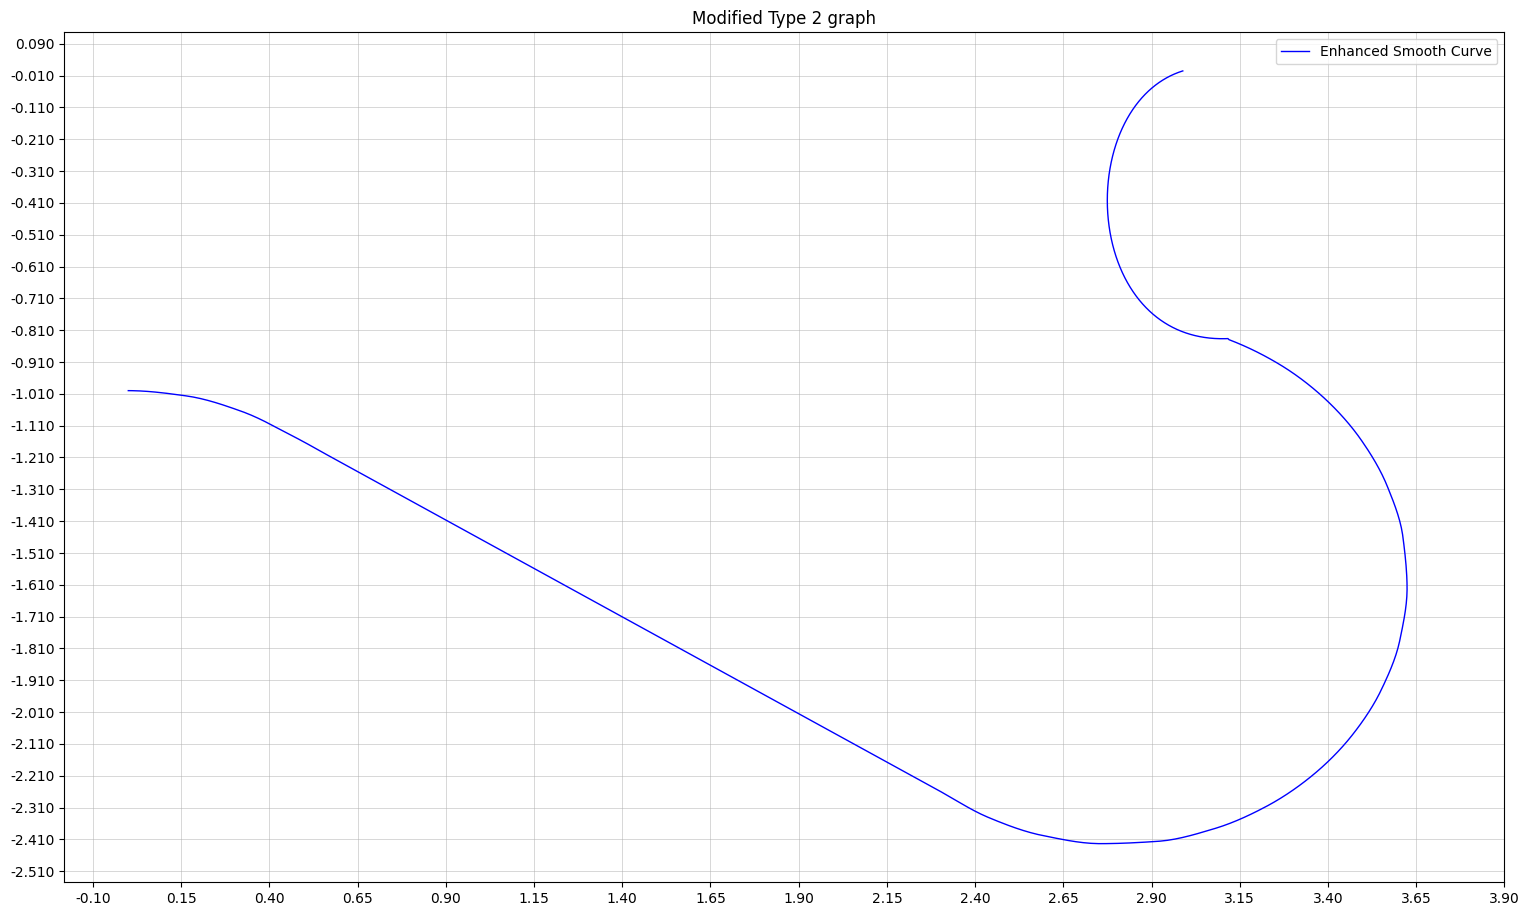

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import PchipInterpolator, splprep, splev

# URL of the raw CSV file from GitHub
github_url = "https://raw.githubusercontent.com/JFRashu/123/refs/heads/main/Topology1.csv"

# Read CSV file from GitHub, skipping the first row (index 0)
data = pd.read_csv(github_url, header=None).to_numpy()

# Extract X and Y columns
original_x = data[:, 0]
original_y = data[:, 1]

# Define the special portion (first 6 points for splprep)
special_x = original_x[:8]
special_y = original_y[:8]
remaining_x = original_x[7:]  # Include last point of special_x to merge smoothly
remaining_y = original_y[7:]

# Apply splprep + splev for the special portion with increased smoothing
tck, u = splprep([special_x, special_y], s=0.01, k=3)  # Increased smoothing
u_fine = np.linspace(0, 1, 150000)  # More fine points for a smoother curve
x_smooth_spl, y_smooth_spl = splev(u_fine, tck)

# Apply PchipInterpolator for the remaining data
t_remaining = np.zeros(len(remaining_x))
for i in range(1, len(remaining_x)):
    t_remaining[i] = t_remaining[i - 1] + np.sqrt(
        (remaining_x[i] - remaining_x[i - 1]) ** 2 + (remaining_y[i] - remaining_y[i - 1]) ** 2
    )

pchip_x = PchipInterpolator(t_remaining, remaining_x)
pchip_y = PchipInterpolator(t_remaining, remaining_y)
t_fine = np.linspace(t_remaining.min(), t_remaining.max(), 500)
x_smooth_pchip = pchip_x(t_fine)
y_smooth_pchip = pchip_y(t_fine)

# Merge both smooth curves by ensuring continuity at the boundary
merged_x = np.concatenate((x_smooth_spl[:-1], x_smooth_pchip))
merged_y = np.concatenate((y_smooth_spl[:-1], y_smooth_pchip))

# Generate 300 evenly spaced points along the curve
# First, create a parameter that represents distance along the curve
curve_lengths = np.zeros(len(merged_x))
for i in range(1, len(merged_x)):
    curve_lengths[i] = curve_lengths[i-1] + np.sqrt(
        (merged_x[i] - merged_x[i-1])**2 + (merged_y[i] - merged_y[i-1])**2
    )

# Create 300 evenly spaced points along the curve
total_length = curve_lengths[-1]
even_spaces = np.linspace(0, total_length, 100)

# Interpolate to get the evenly spaced points
x_interpolator = np.interp(even_spaces, curve_lengths, merged_x)
y_interpolator = np.interp(even_spaces, curve_lengths, merged_y)

# Create a DataFrame with the 300 points
sampled_points = pd.DataFrame({
    'X': x_interpolator,
    'Y': y_interpolator
})

# Save to CSV
output_file = "type_2_100_points.csv"
sampled_points.to_csv(output_file, index=False)

# Plot the original curve and the 300 sampled points
plt.figure(figsize=(16, 10))
plt.plot(merged_x, merged_y, 'b-', linewidth=1, label="Enhanced Smooth Curve")
# plt.plot(x_interpolator, y_interpolator, 'ro', markersize=2, label="300 Sampled Points")

# Set custom grid with specified intervals
x_min = np.floor(original_x.min() * 4) / 4
x_max = np.ceil(original_x.max() * 4) / 4
x_ticks = np.arange(x_min - 0.1, x_max + 0.25, 0.25)

y_min = np.floor(original_y.min() * 10) / 10
y_max = np.ceil(original_y.max() * 10) / 10
y_ticks = np.arange(y_min - 0.01, y_max + 0.1, 0.1)

plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))

print(f"100 points have been saved to {output_file}")
plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
plt.savefig("Smooth_curve_for_300_points_without_original_data.png", format="png", dpi=1500)

plt.title("Modified Type 2 graph")
plt.legend()
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)
plt.show()

# print(f"300 points have been saved to {output_file}")
# plt.tight_layout()
# plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
# plt.savefig("Smooth_curve_for_400_points_without_original_data.png", format="png", dpi=1500)